In [21]:
import pandas as pd
import numpy as np
from faker import Faker
import matplotlib.pyplot as plt

In [22]:
file_name = ['dataset/1_idle_data.csv', 'dataset/2_minor_vibration_data.csv', 'dataset/3_hard_data.csv']

dataframes = []

status = ['idle', 'false_motion', 'used']

for file in file_name:
    df = pd.read_csv(file)
    if file == "dataset/1_idle_data.csv": 
        df['status'] = status[0]
    elif file == "dataset/2_minor_vibration_data.csv": 
        df['status'] = status[1]
    else:
        df['status'] = status[2]
    dataframes.append(df)
 


In [23]:
df = pd.concat(dataframes, ignore_index=True)
df.to_csv('accelerometer_dataset.csv', index=False)


In [ ]:
# Idle: Near-zero values with very small random noise.
# Minor Vibration: Small fluctuations that mimic slight movement.
# Used: Higher consistent vibration values than idle and minor vibration.

In [24]:
#Add noise
def generate_idle(size):
    return np.random.normal(0, 0.05, size=size)

def generate_false_motion(size):
    return np.random.normal(0.1, 0.02, size=size)

def generate_used(size):
    return np.random.normal(1.0, 0.15, size=size)

def update_realistic_data(row):
    size = 1
    if row['status'] == 'idle':
        row['x'], row['y'], row['z'] = generate_idle(size)[0], generate_idle(size)[0], generate_idle(size)[0]
    elif row['status'] == 'minor vibration':
        row['x'], row['y'], row['z'] = generate_false_motion(size)[0], generate_false_motion(size)[0], generate_false_motion(size)[0]
    elif row['status'] == 'hard_concrete':
        row['x'], row['y'], row['z'] = generate_used(size)[0], generate_used(size)[0], generate_used(size)[0]
    return row

realistic_data = df.apply(update_realistic_data, axis=1)


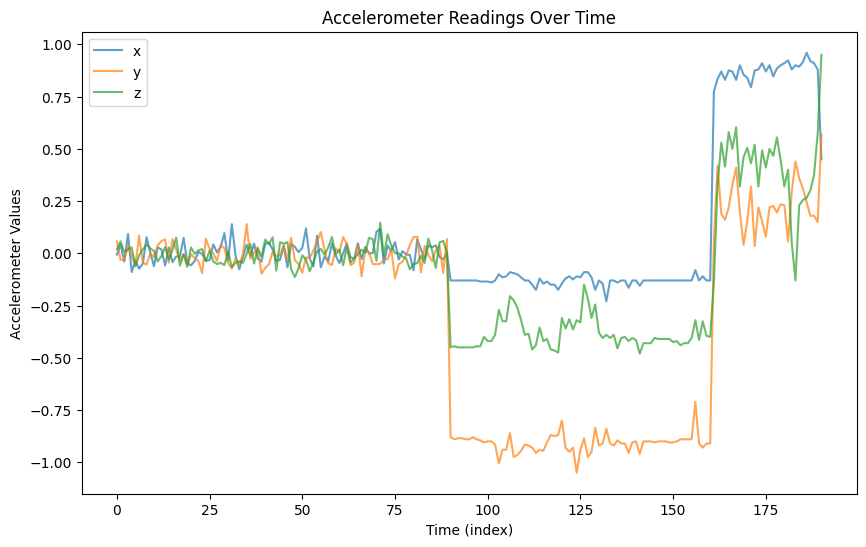

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(realistic_data.index, realistic_data['x'], label='x', alpha=0.7)
plt.plot(realistic_data.index, realistic_data['y'], label='y', alpha=0.7)
plt.plot(realistic_data.index, realistic_data['z'], label='z', alpha=0.7)
plt.title('Accelerometer Readings Over Time')
plt.xlabel('Time (index)')
plt.ylabel('Accelerometer Values')
plt.legend()
plt.show()


**Generate more data using Faker Package**

In [26]:
original_data_path = 'accelerometer_dataset.csv'
original_data = pd.read_csv(original_data_path)

In [27]:
fake= Faker()

def calculate_baseline_stats(data):
    stats = {}
    statuses = data['status'].unique()
    for status in statuses:
        subset = data[data['status'] == status]
        stats[status] = {
            'x_mean': subset['x'].mean(),
            'x_std': subset['x'].std(),
            'y_mean': subset['y'].mean(),
            'y_std': subset['y'].std(),
            'z_mean': subset['z'].mean(),
            'z_std': subset['z'].std(),
        }
    return stats

baseline_stats = calculate_baseline_stats(original_data)

def generate_data_from_baseline(baseline_stats, rows_per_status):
    synthetic_data = []
    for status, stats in baseline_stats.items():
        x = np.random.normal(stats['x_mean'], stats['x_std'], size=rows_per_status)
        y = np.random.normal(stats['y_mean'], stats['y_std'], size=rows_per_status)
        z = np.random.normal(stats['z_mean'], stats['z_std'], size=rows_per_status)
        for i in range(rows_per_status):
            synthetic_data.append({
                'x': x[i],
                'y': y[i],
                'z': z[i],
                'status': status,
            })
    return pd.DataFrame(synthetic_data)

synthetic_data = generate_data_from_baseline(baseline_stats, 100000)


In [28]:
file_path = 'synthetic_data.csv'
synthetic_data.to_csv(file_path, index=False)

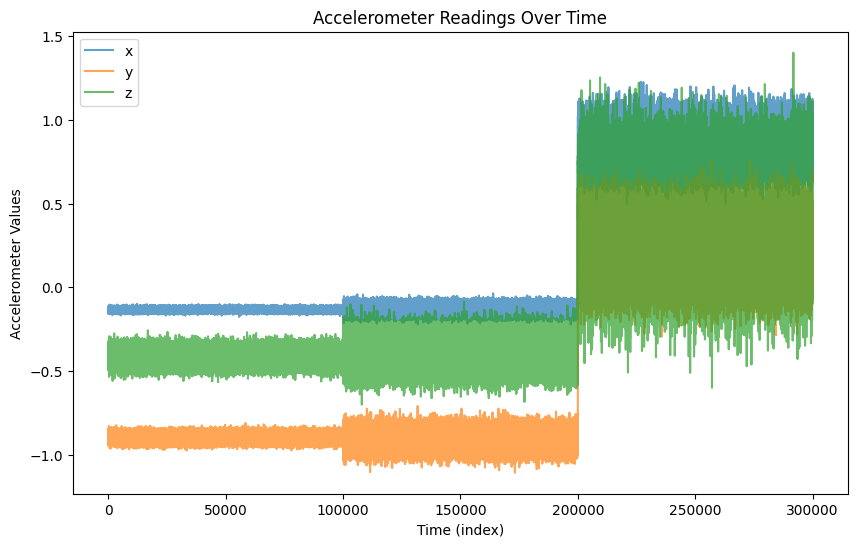

In [29]:
df = pd.read_csv('synthetic_data.csv')

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['x'], label='x', alpha=0.7)
plt.plot(df.index, df['y'], label='y', alpha=0.7)
plt.plot(df.index, df['z'], label='z', alpha=0.7)
plt.title('Accelerometer Readings Over Time')
plt.xlabel('Time (index)')
plt.ylabel('Accelerometer Values')
plt.legend()
plt.show()


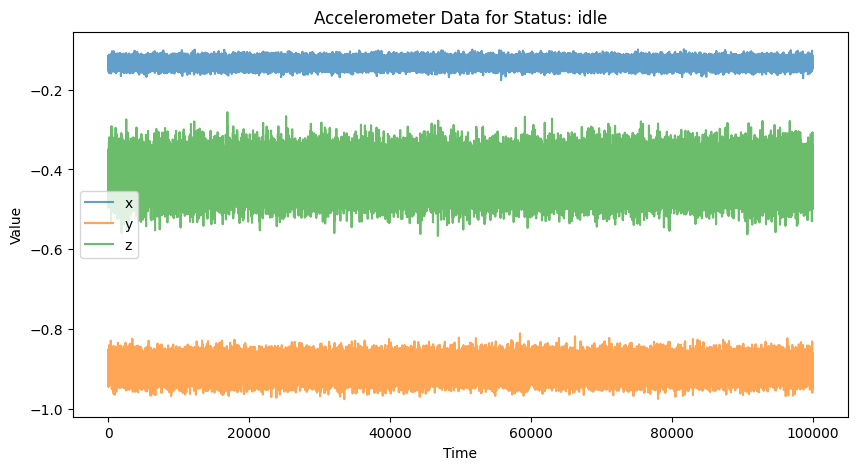

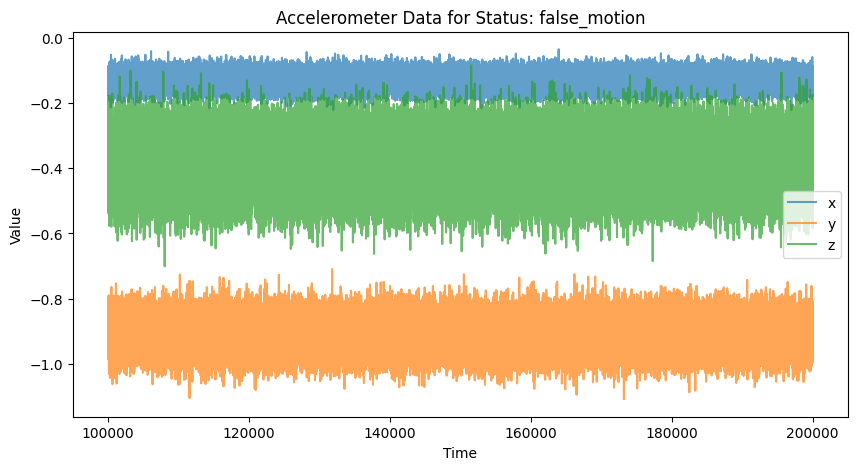

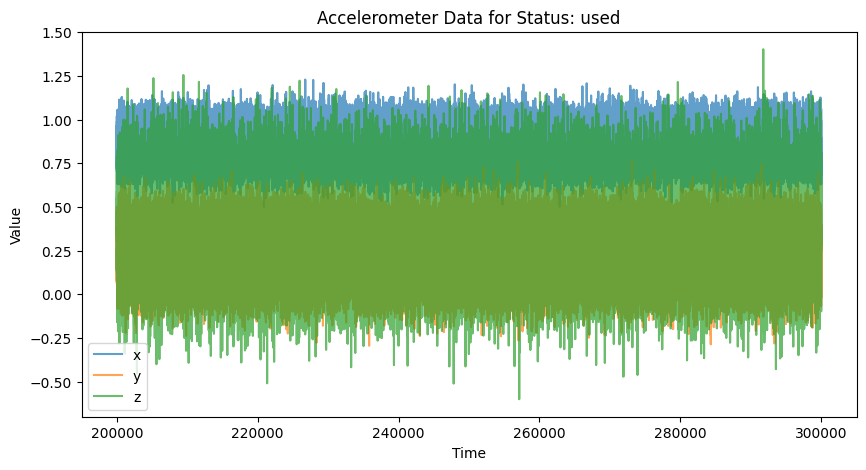

In [30]:
df['time'] = range(len(df))
statuses = df['status'].unique()

for status in statuses:
    subset = df[df['status'] == status]
    plt.figure(figsize=(10, 5))
    plt.plot(subset['time'], subset['x'], label='x', alpha=0.7)
    plt.plot(subset['time'], subset['y'], label='y', alpha=0.7)
    plt.plot(subset['time'], subset['z'], label='z', alpha=0.7)
    plt.title(f'Accelerometer Data for Status: {status}')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.show()


In [31]:
stats = df.groupby('status').agg(['mean', 'std', 'min', 'max'])
print(stats)


                     x                                       y            \
                  mean       std       min       max      mean       std   
status                                                                     
false_motion -0.130173  0.021717 -0.221895 -0.035508 -0.908456  0.043889   
idle         -0.133471  0.008610 -0.176501 -0.098890 -0.898334  0.019566   
used          0.862944  0.087525  0.499258  1.228511  0.229718  0.125662   

                                         z                                \
                   min       max      mean       std       min       max   
status                                                                     
false_motion -1.107720 -0.708811 -0.386649  0.070028 -0.700510 -0.084854   
idle         -0.975575 -0.810267 -0.415863  0.035792 -0.566632 -0.256579   
used         -0.294397  0.767449  0.394310  0.212141 -0.600098  1.402090   

                  time                                
                  mean         